# **Multi-Input & Output** 🧬

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Fuel consumption 2019.csv')

In [ ]:
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [ ]:
df.columns

Index(['Model-Year', 'Make', 'Model', 'Vehicle-Class', 'Engine-Size',
       'Cylinders', 'Transmission', 'Fuel-Type', 'Fuel-Consumption-City',
       'Fuel-Consumption-Hwy', 'Fuel-Consumption-Comb', 'CO2-Emissions'],
      dtype='object')

In [ ]:
x_data = df.iloc[:,[4,5,8]].values
y_data = df.iloc[:, -1].values

In [ ]:
x_data.shape

(1046, 3)

In [ ]:
y_data.shape

(1046,)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

**Multi-Input & Output**

In [ ]:
Input1 = Input(shape=(2,))
Input2 = Input(shape=(3,))

In [ ]:
h1 = Dense(3, activation='relu')(Input1)
h2 = Dense(3, activation='relu')(Input2)

In [ ]:
output1 = Dense(1)(h1)
output2 = Dense(1)(h2)

In [ ]:
model = Model(inputs=[Input1, Input2], outputs=[output1, output2])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │          9 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │         12 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │          4 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │          4 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

# **BatchNormlization** 💯

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
x_train.shape

(7500, 8)

In [ ]:
x_test.shape

(2500, 8)

In [ ]:
y_train.shape

(7500,)

In [ ]:
y_test.shape

(2500,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 24 (96.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=.1, callbacks=[early_stop])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6032 - loss: 0.7313 - val_accuracy: 0.8027 - val_loss: 0.4933
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7821 - loss: 0.4971 - val_accuracy: 0.8187 - val_loss: 0.4580
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4702 - val_accuracy: 0.8187 - val_loss: 0.4417
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4650 - val_accuracy: 0.8240 - val_loss: 0.4323
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4613 - val_accuracy: 0.8253 - val_loss: 0.4247
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8089 - loss: 0.4404 - val_accuracy: 0.8253 - val_loss: 0.4172
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: 0.4390 - val_accuracy: 0.8333 - val_loss: 0.4100
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.4288 - val_accu

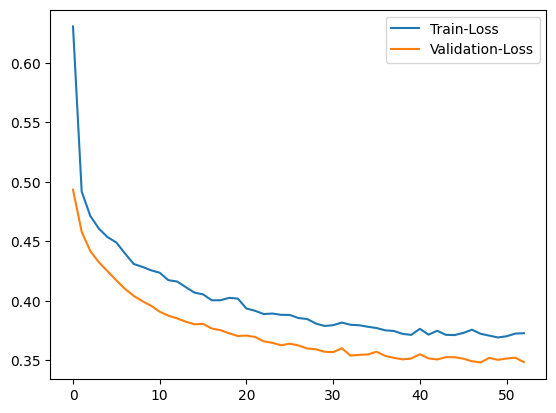

In [ ]:
plt.plot(history.history['loss'], label='Train-Loss')
plt.plot(history.history['val_loss'], label='Validation-Loss')
plt.legend()
plt.show()

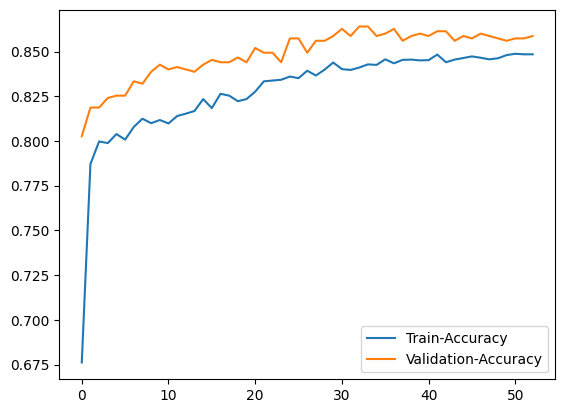

In [ ]:
plt.plot(history.history['accuracy'], label='Train-Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred

array([[0.06320002],
       [0.03702889],
       [0.12355181],
       ...,
       [0.04293741],
       [0.21139485],
       [0.03686775]], dtype=float32)

In [46]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy_score(y_pred, y_test) ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [47]:
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

In [49]:
accuracy_score(y_pred, y_test)

0.8612

# **Optimization** ⚡

## **SGD + Momentum**

In [50]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [52]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [53]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [54]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=.1, callbacks=[early_stop])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7422 - loss: 0.5286 - val_accuracy: 0.8440 - val_loss: 0.3780
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8344 - loss: 0.3942 - val_accuracy: 0.8480 - val_loss: 0.3598
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3857 - val_accuracy: 0.8600 - val_loss: 0.3522
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8317 - loss: 0.4025 - val_accuracy: 0.8533 - val_loss: 0.3515
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3701 - val_accuracy: 0.8613 - val_loss: 0.3489
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8411 - loss: 0.3835 - val_accuracy: 0.8533 - val_loss: 0.3515
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3732 - val_accuracy: 0.8667 - val_loss: 0.3512
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3817 - val_accu

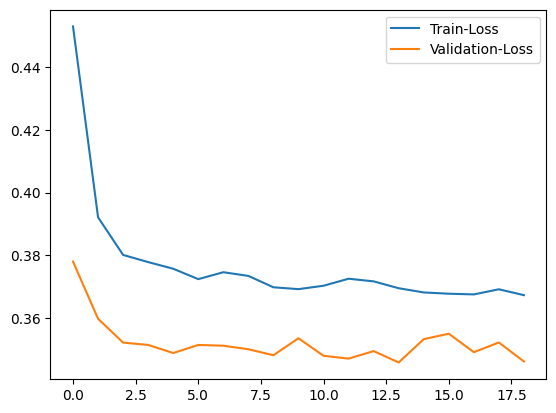

In [55]:
plt.plot(history.history['loss'], label='Train-Loss')
plt.plot(history.history['val_loss'], label='Validation-Loss')
plt.legend()
plt.show()

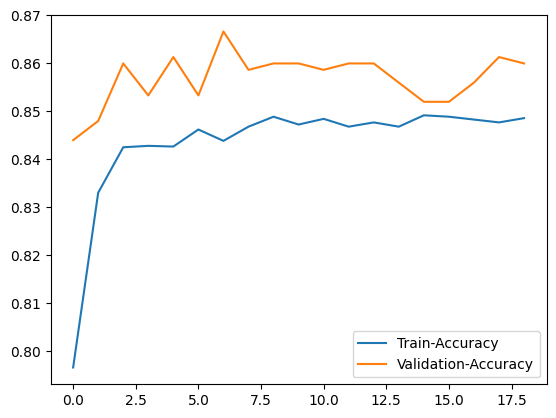

In [56]:
plt.plot(history.history['accuracy'], label='Train-Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.legend()
plt.show()

In [57]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

In [59]:
accuracy_score(y_pred, y_test)

0.8628

## **Adagrad (Adaptive Gradient)**

In [60]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.01)

In [62]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [63]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [64]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=.1, callbacks=[early_stop])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6136 - loss: 0.6694 - val_accuracy: 0.7880 - val_loss: 0.5398
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7604 - loss: 0.5393 - val_accuracy: 0.8040 - val_loss: 0.4932
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7835 - loss: 0.5055 - val_accuracy: 0.8240 - val_loss: 0.4675
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4723 - val_accuracy: 0.8227 - val_loss: 0.4512
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4618 - val_accuracy: 0.8213 - val_loss: 0.4415
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8115 - loss: 0.4473 - val_accuracy: 0.8187 - val_loss: 0.4355
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4631 - val_accuracy: 0.8187 - val_loss: 0.4311
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4512 - val_accu

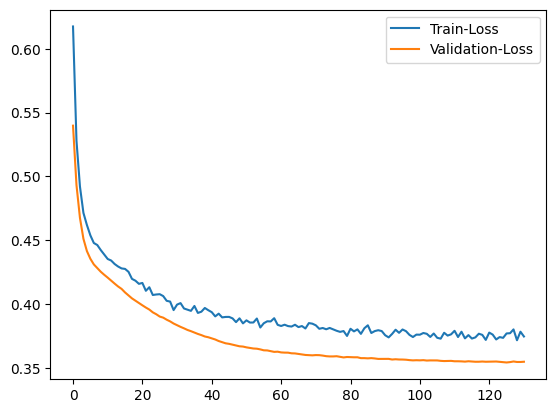

In [65]:
plt.plot(history.history['loss'], label='Train-Loss')
plt.plot(history.history['val_loss'], label='Validation-Loss')
plt.legend()
plt.show()

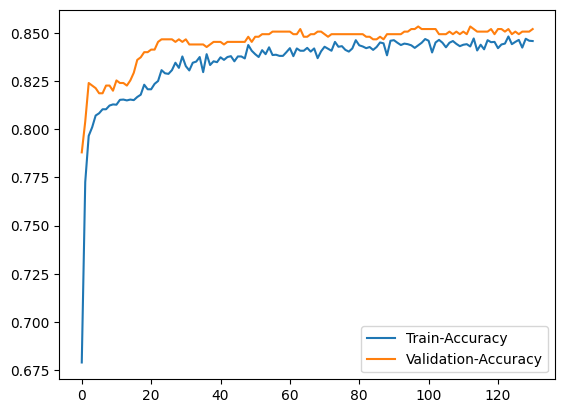

In [66]:
plt.plot(history.history['accuracy'], label='Train-Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.legend()
plt.show()

In [67]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

In [69]:
accuracy_score(y_pred, y_test)

0.8596

## **RMSprop**

In [71]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)

In [73]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [74]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [75]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=.1, callbacks=[early_stop])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7762 - loss: 0.5155 - val_accuracy: 0.8333 - val_loss: 0.4123
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8259 - loss: 0.4139 - val_accuracy: 0.8440 - val_loss: 0.3851
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8326 - loss: 0.4007 - val_accuracy: 0.8493 - val_loss: 0.3794
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.3819 - val_accuracy: 0.8560 - val_loss: 0.3576
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3804 - val_accuracy: 0.8507 - val_loss: 0.3535
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.3828 - val_accuracy: 0.8547 - val_loss: 0.3548
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3754 - val_accuracy: 0.8587 - val_loss: 0.3474
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.3674 - val_accu

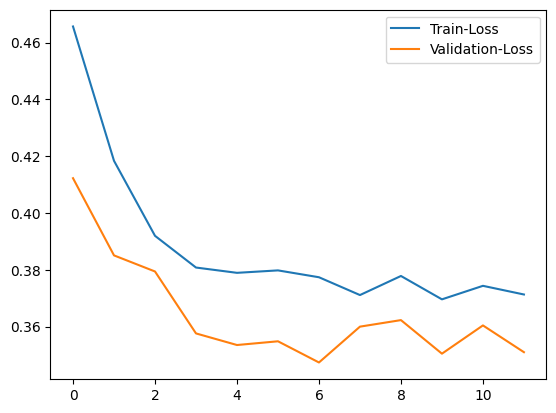

In [76]:
plt.plot(history.history['loss'], label='Train-Loss')
plt.plot(history.history['val_loss'], label='Validation-Loss')
plt.legend()
plt.show()

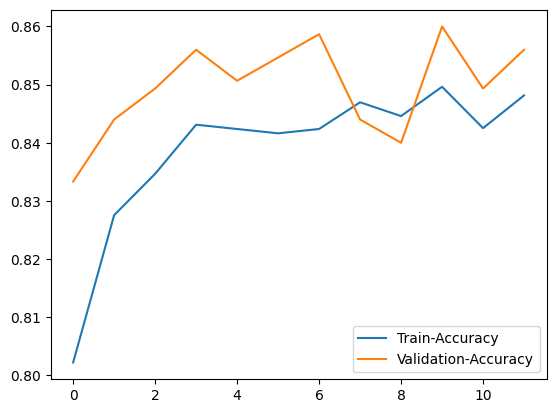

In [77]:
plt.plot(history.history['accuracy'], label='Train-Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.legend()
plt.show()

In [78]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

In [80]:
accuracy_score(y_pred, y_test)

0.8604

## **Adam**

In [82]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [83]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [84]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [85]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [86]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=.1, callbacks=[early_stop])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5593 - loss: 0.7283 - val_accuracy: 0.7907 - val_loss: 0.5450
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7641 - loss: 0.5305 - val_accuracy: 0.8093 - val_loss: 0.4744
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7912 - loss: 0.4817 - val_accuracy: 0.8147 - val_loss: 0.4461
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7858 - loss: 0.4766 - val_accuracy: 0.8160 - val_loss: 0.4323
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8074 - loss: 0.4451 - val_accuracy: 0.8213 - val_loss: 0.4225
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8081 - loss: 0.4398 - val_accuracy: 0.8213 - val_loss: 0.4155
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4377 - val_accuracy: 0.8213 - val_loss: 0.4051
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8189 - loss: 0.4102 - val_accu

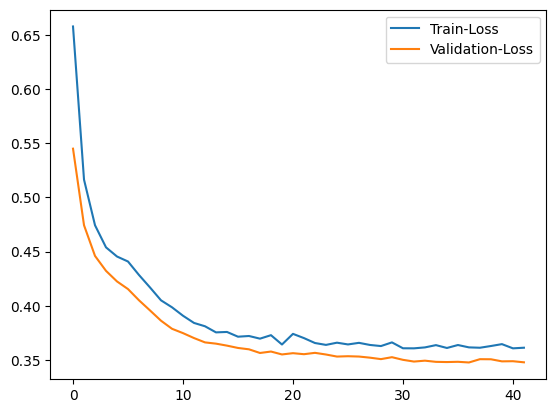

In [87]:
plt.plot(history.history['loss'], label='Train-Loss')
plt.plot(history.history['val_loss'], label='Validation-Loss')
plt.legend()
plt.show()

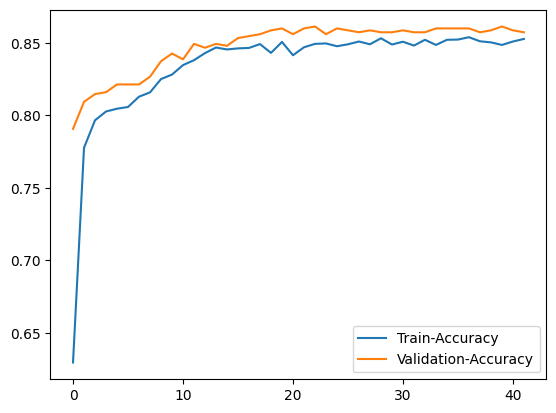

In [88]:
plt.plot(history.history['accuracy'], label='Train-Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.legend()
plt.show()

In [89]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [90]:
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

In [91]:
accuracy_score(y_pred, y_test)

0.8584